# Income Qualification

## Objective:
Identify the level of income qualification status needed to disburse finacial aid for families in Latin America

### Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.


## Task 1: Identify the output variable - 'train.csv'

In [1]:
# Import Python Libraries.
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r"D:\train.csv")

# Set max_columns option to None to display all columns
pd.set_option('display.max_columns', None)

train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,

## Task 2: Understand the type of data

In [3]:
# Use info() method to display the structure and metadata of the DataFrame named 'train.csv'.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
# An attribute that returns the demensions (i.e., the number of rows and columns) of the DataFrame .
train.shape

(9557, 143)

In [5]:
# A method that returns only the columns that have a data type of float (i.e., floating-point numbers).
train.select_dtypes(float)

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.00,1.000000,1.000000,0.0000,100.0000
1,135000.0,1.0,NaN,12.00,1.000000,1.000000,64.0000,144.0000
2,NaN,NaN,NaN,11.00,0.500000,0.250000,64.0000,121.0000
3,180000.0,1.0,1.0,11.00,1.333333,1.777778,1.0000,121.0000
4,180000.0,1.0,NaN,11.00,1.333333,1.777778,1.0000,121.0000
...,...,...,...,...,...,...,...,...
9552,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9553,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9554,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9555,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625


In [6]:
# A method that returns only the columns that have a data type of int64 (i.e., 64-bit integer values).
train.select_dtypes('int64')

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,1,0,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,9,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0,0,0,1,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,2116,2
9553,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,5,1,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,2,0,4,25,81,1,4,2
9554,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,5,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0,1,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,50,25,2500,25,81,1,2500,2
9555,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5

In [7]:
# A method that returns only the columns that have a data type of object (i.e.,string or mixed data types).
train.select_dtypes(object)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


## Task 3: Check if there are any biases in your dataset
### Target variable has 4 values that indicate different groups of income levels as follows:
* 1 = extreme poverty
* 2 = moderate poverty
* 3 = vulnerable households
* 4 = non vulnerable households

In [8]:
# Use Pandas method to count the occurrences of each unique value in the 'Target' column of the DataFrame 'train'.
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [9]:
# Getting the percentage of the 'Target' value counts
(train['Target'].value_counts() / len(train)) * 100

4    62.739353
2    16.710265
3    12.650413
1     7.899969
Name: Target, dtype: float64

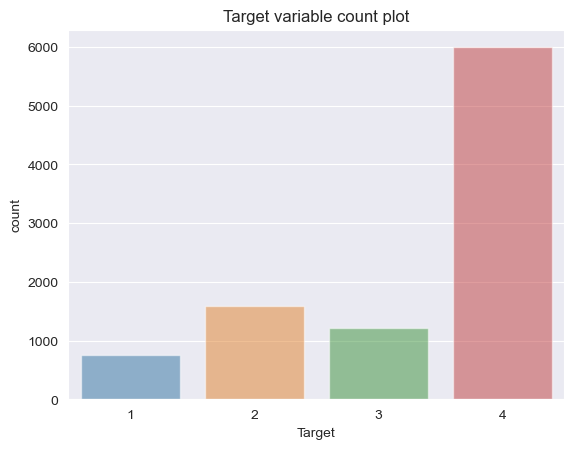

In [10]:
# Import Python Seaborn Library.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Create a countplot to visulaise the balance of the data set based on 'Target' variable.
sns.countplot(x = 'Target', data = train, alpha=0.5).set_title('Target variable count plot')

# Show the plot.
plt.show()

In [11]:
# Comments:
#  - It appears that the 'Target' variable is inbalanced.
#  - With value '4' (i.e., non vulnerable households) being the most frequent, followed by '2', '3',
#        and '1' (i.e., extreme poverty).

## Task 4: Check whether all members of the house have the same poverty level.
* (96)  idhogar = Houselevel identifer
* (143) target  = Poverty_levels

In [12]:
# Group by 'idhogar' and select 'Target' column.
grouped = train.groupby('idhogar')['Target']

# Get the unique values in 'Target' column for each household.
unique_poverty_levels = grouped.unique()

# Count the occurrences of each unique value in 'Target' column for each household.
poverty_level_counts = unique_poverty_levels.apply(lambda x: len(np.where((x >= 1) & (x <= 4))[0]))

# Get the count of households where all members have the same poverty level.
num_same_poverty_level = (poverty_level_counts == 1).sum()
num_same_poverty_level

2903

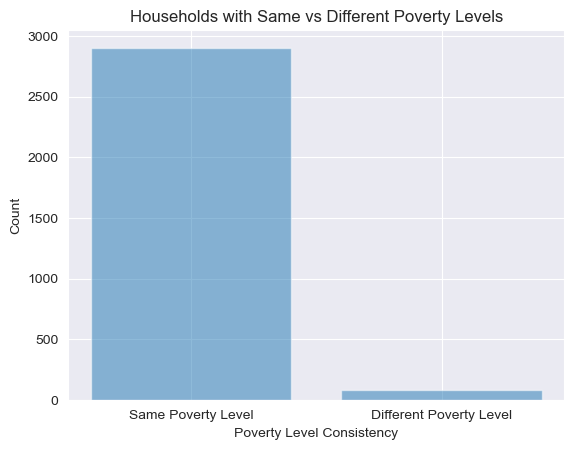

In [13]:
# Create a bar chart.
plt.bar(['Same Poverty Level', 'Different Poverty Level'], [num_same_poverty_level,
        len(train['idhogar'].unique()) - num_same_poverty_level], alpha=0.5)

# Set the labels and title
plt.xlabel('Poverty Level Consistency')
plt.ylabel('Count')
plt.title('Households with Same vs Different Poverty Levels')

# Show the plot.
plt.show()

## Task 5: Check if there is a house without a family head
    * (84) parentesco1 = '1' if household head and '0' if without household head
    * (96) idhogar     = House level identifer

In [14]:
# Grouping by idhogar by unique values (2988 unique ids), then counting occurences of 1 and 0
#     in 'parentesco1' column.

family_head_counts2 = train.groupby('idhogar')['parentesco1'].sum().value_counts()
family_head_counts2

1    2973
0      15
Name: parentesco1, dtype: int64

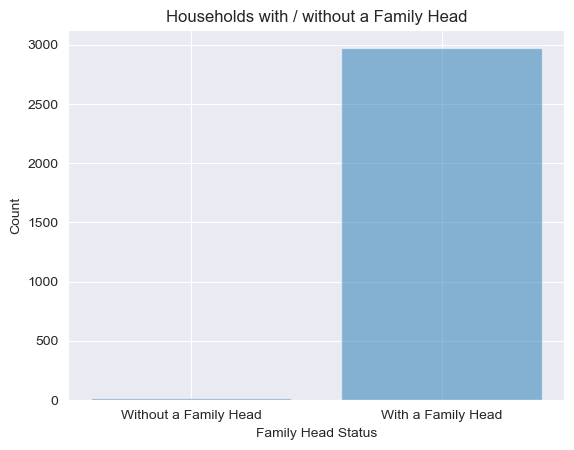

In [15]:
# Extract counts for household heads (1) and non-household heads (0).
family_heads2 = family_head_counts2[1]
no_family_heads2 = family_head_counts2[0]

# Create a bar chart.
plt.bar(['Without a Family Head', 'With a Family Head'],
        [no_family_heads2, family_heads2], alpha=0.5)
plt.xlabel('Family Head Status')
plt.ylabel('Count')
plt.title('Households with / without a Family Head')
plt.show()

## Task 6: Set the poverty level of the members and the head of the house within a family
#### Objective: Set the poverty level, i.e. grouped by targets, of all family members (children + adults + family head) to be the same as that of the (household) head of the household.
    * (84) parentesco1 = '1' if household head and '0' if without household head
    * (97) hogar_nin   = Number of children 0 to 19 in household
    * (98) hogar_adul  = Number of adults in household

In [16]:
# Select specific columns and display rows
selected_rows = train[['parentesco1', 'hogar_nin', 'hogar_adul', 'Target']]

# Display selected rows for selected columns
print(selected_rows)

      parentesco1  hogar_nin  hogar_adul  Target
0               1          0           1       4
1               1          0           1       4
2               1          0           1       4
3               0          2           2       4
4               0          2           2       4
...           ...        ...         ...     ...
9552            1          1           4       2
9553            0          1           4       2
9554            0          1           4       2
9555            0          1           4       2
9556            0          1           4       2

[9557 rows x 4 columns]


In [17]:
# Group by 'Target' column
grouped = selected_rows.groupby('Target')

# Loop through each group
for name, group in grouped:
    print("Target: ", name)
    # Perform value_counts() on the 'parentesco1', 'hogar_nin', and 'hogar_adul' columns
    print("parentesco1: ")
    print(group['parentesco1'].value_counts())
    print("hogar_nin: ")
    print(group['hogar_nin'].value_counts())
    print("hogar_adul: ")
    print(group['hogar_adul'].value_counts())
    print("-------------")

Target:  1
parentesco1: 
0    533
1    222
Name: parentesco1, dtype: int64
hogar_nin: 
2    168
1    153
3    140
0    135
4     77
5     43
8     19
9     13
6      7
Name: hogar_nin, dtype: int64
hogar_adul: 
2    356
1    197
3    134
4     49
6     19
Name: hogar_adul, dtype: int64
-------------
Target:  2
parentesco1: 
0    1155
1     442
Name: parentesco1, dtype: int64
hogar_nin: 
2    402
3    348
1    311
0    306
4    144
6     44
5     33
7      9
Name: hogar_nin, dtype: int64
hogar_adul: 
2    832
3    278
1    257
4    170
5     56
6      4
Name: hogar_adul, dtype: int64
-------------
Target:  3
parentesco1: 
0    854
1    355
Name: parentesco1, dtype: int64
hogar_nin: 
2    342
1    321
0    248
3    218
4     49
5     19
6     12
Name: hogar_nin, dtype: int64
hogar_adul: 
2    594
3    257
4    138
1    127
5     52
6     41
Name: hogar_adul, dtype: int64
-------------
Target:  4
parentesco1: 
0    4042
1    1954
Name: parentesco1, dtype: int64
hogar_nin: 
0    2308
1    

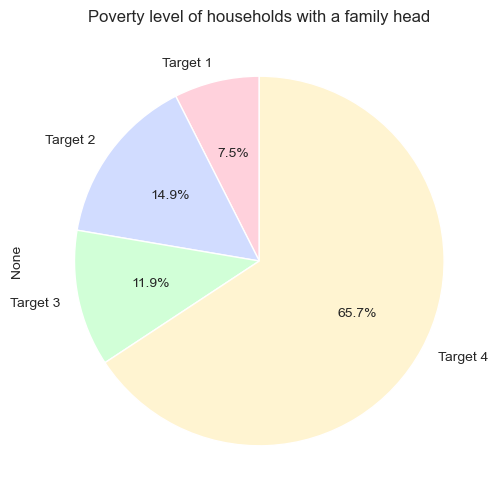

In [18]:
# Filter the DataFrame to include only rows with a family head
families_with_head = selected_rows[selected_rows['parentesco1'] == 1]

# Group by 'Target' column (poverty level)
grouped = families_with_head.groupby('Target')

# Calculate the count of families with a head for each poverty level
families_count = grouped.size()

# Define a list of pastel colors
pastel_colors = ['#ffd1dc', '#d1dcff', '#d1ffd7', '#fff4d1', '#d1fff4']

# Define the target labels
target_labels = ['Target 1', 'Target 2', 'Target 3', 'Target 4']

# Plot the result as a pie chart with pastel colors and target labels
families_count.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 6),
                        title='Poverty level of households with a family head',
                        colors=pastel_colors, labels=target_labels)

# Display the pie chart
plt.show()

## Task 7: Count how many null values are existing in columns
### Note 1: The float64 data type contains the following missing values.
            * (2)   v2a1     (6,860) = Monthly rent payment
            * (9)   v18q1    (7,342) = Number of all tablets household owns
            * (22)  rez_esc  (7,928) = Years behind in school
            * (104) meaneduc     (5) = Average years of education for adults (18+)
            * (141) SQBmeaned    (5) = Mean^2 years of education of adults (>=18) in the household

In [19]:
#Find columns with null values
null_counts = train.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

### Note 2: No null values for integer data type features.

In [20]:
#Find columns with null values
null_counts = train.select_dtypes('int64').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

### Note 3: No null values for object data type features.

In [21]:
#Find columns with null values
null_counts=train.select_dtypes(object).isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

## Task 8: Remove null value rows of the target variable
            * (2)   v2a1     (6,860) = Monthly rent payment - 71.8%
            * (9)   v18q1    (7,342) = Number of all tablets household owns - 76.8%
            * (22)  rez_esc  (7,928) = Years behind in school - 82.9%
            * (104) meaneduc     (5) = Average years of education for adults (18+) - 0.05%
            * (141) SQBmeaned    (5) = Mean^2 years of education of adults (>=18) in the household - 0.05%

#### Data Cleaning 1: Replace mixed values in the columns 'dependency', 'edjefe' 'edjefa'

In [22]:
# These columns with object data type contain mixed value.
train.loc[:, 'dependency':'edjefa'].head()

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no


In [23]:
#replacing dependency of 'no' with 0

columns_to_replace = ['dependency']
train[columns_to_replace] = train[columns_to_replace].replace({'no': 0})
print(train['dependency'].head())

0      0
1      8
2      8
3    yes
4    yes
Name: dependency, dtype: object


In [24]:
#Converting dependency 'yes' to np.nan and replacing it with the median 

train['dependency'] = train['dependency'].replace({'yes': np.nan})
train['dependency'] = pd.to_numeric(train['dependency'])
median = train['dependency'].median()
train['dependency'] = train['dependency'].fillna(median)

# Calculate the median of the 'dependency' column of 'train' dataset.
train['dependency'].median()

0.5

In [25]:
#checking to make sure the column are a float
print(train['dependency'].dtypes)

float64


In [26]:
# Use a mapping dictionary to replace 'yes' with '1' and 'no' with '0' for columns 'edjefe' and 'edjefa'
mapping = {'yes':1,'no':0}

for df in [train]:
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    
train[['edjefe','edjefa']].describe()

# Display selected columns of 'train' dataset after data cleaning.
train[['dependency','edjefe','edjefa']]

,dependency,edjefe,edjefa
0,0.00,10.0,0.0
1,8.00,12.0,0.0
2,8.00,0.0,11.0
3,0.50,11.0,0.0
4,0.50,11.0,0.0
...,...,...,...
9552,0.25,9.0,0.0
9553,0.25,9.0,0.0
9554,0.25,9.0,0.0
9555,0.25,9.0,0.0


#### Data Cleaning 2: Fix column (2) v2a1: Monthly rent payment with null values to '0'
            * (2)   v2a1      = Monthly rent payment (6,860 null values)
            * (116) tipovivi1 = 1 own and fully paid house
            * (117) tipovivi2 = 1 own, paying in installments
            * (118) tipovivi3 = 1 rented
            * (119) tipovivi4 = 1 precarious
            * (120) tipovivi5 = 1 other(assigned,  borrowed)
            
Action taken: Replace 'Nan' with the median values grouped by "Target" column

In [27]:
train.groupby('Target')['v2a1'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
1,153.0,84806.464052,51955.287818,0.0,50000.0,80000.0,100000.0,249896.0
2,337.0,97015.166172,53861.050411,0.0,50000.0,90000.0,130000.0,225000.0
3,300.0,102618.093333,58996.916717,13000.0,50000.0,90000.0,150000.0,270000.0
4,1907.0,193589.258521,167283.430436,0.0,100000.0,150000.0,250000.0,2353477.0


In [28]:
# Find the median of rent for each target group
rent_median_by_target = train.groupby('Target')['v2a1'].median()

# Fill the null values with the median of each target group
df['v2a1'] = df.groupby('Target')['v2a1'].apply(lambda x: x.fillna(rent_median_by_target.loc[x.name]))

In [29]:
#check to make sure all null values have been filled
df["v2a1"].isnull().sum()

0

#### Data Cleaning 3: Fix column (9) v18q1: number of tablets household owns with null values to '0'
            * v18q  (8) = owns a tablet
            * v18q1 (9) = number of tablets household owns (7,342 null values)
Action taken: Replace 'Nan' with '0' because if a household does not 'owns a tablet',
              the count of tablets they own should also be '0'.

In [30]:
train[['v18q', 'v18q1']][train['v18q1'].isnull()]

,v18q,v18q1
0,0,NaN
2,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN
...,...,...
9552,0,NaN
9553,0,NaN
9554,0,NaN
9555,0,NaN


In [31]:
# Replace the missing (NaN) values in the 'v18q1' column with the value 0.
train['v18q1'].fillna(value=0, inplace=True)

train['v18q1'].value_counts()

0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

#### Data Cleaning 4: Fix column (22) rez_esc: Years behind in school with null values to '0'
            * (22) rez_esc = Years behind in school (7,928 null values)
            * (133) age    = Age in years
Action taken: Drop entire column as there are other columns that can help us identify education levels.

In [32]:
#drop column

train.drop('rez_esc', axis=1, inplace=True)

#### Data Cleaning 5: Fix column (104) meaneduc: Average years of education for adults (18+) with null values to '0'
            * (104) meaneduc    = Average years of education for adults (18+) (5 null values)
            
            * (102) edjefe      = years of education of male head of household,
                                  based on the interaction of escolari (years of education),
                                  head of household and gender, yes=1 and no=0
                                 
            * (103) edjefa      = years of education of female head of household,
                                  based on the interaction of escolari (years of education),
                                  head of household and gender, yes=1 and no=0
                                 
            * (105) instlevel1  = 1 no level of education
            * (106) instlevel2  = 1 incomplete primary
Action taken: Replace 'Nan' with '0' as null value of '5' is immaterial.

In [33]:
train[['meaneduc', 'edjefe', 'edjefa', 'instlevel1', 'instlevel2', 'age']][train['meaneduc'].isnull()]

,meaneduc,edjefe,edjefa,instlevel1,instlevel2,age
1291,NaN,0.0,10.0,0,0,18
1840,NaN,4.0,0.0,0,0,18
1841,NaN,4.0,0.0,0,1,18
2049,NaN,12.0,0.0,0,0,19
2050,NaN,12.0,0.0,0,0,19


In [34]:
# Replace the missing (NaN) values in the 'meaneduc' column with the value 0.
train['meaneduc'].fillna(value=0, inplace=True)

train['meaneduc'].isnull().sum()

0

#### Data Cleaning 6: Fix column (141) rez_esc: Years behind in school with null values to '0'
            * (141) SQBmeaned = Mean^2 years of education of adults (>=18) in the household (5 null values)
            
            * (102) edjefe    = years of education of male head of household,
                                based on the interaction of escolari (years of education),
                                head of household and gender, yes=1 and no=0
                                 
            * (103) edjefa    = years of education of female head of household,
                                based on the interaction of escolari (years of education),
                                head of household and gender, yes=1 and no=0
                                 
            * (105) instlevel1 = 1 no level of education
            * (106) instlevel2 = 1 incomplete primary
Action taken: Replace 'Nan' with '0' as null value of '5' is immaterial.

In [35]:
train[['SQBmeaned', 'edjefe', 'edjefa', 'instlevel1', 'instlevel2']][train['SQBmeaned'].isnull()]

,SQBmeaned,edjefe,edjefa,instlevel1,instlevel2
1291,NaN,0.0,10.0,0,0
1840,NaN,4.0,0.0,0,0
1841,NaN,4.0,0.0,0,1
2049,NaN,12.0,0.0,0,0
2050,NaN,12.0,0.0,0,0


In [36]:
# Replace the missing (NaN) values in the 'meaneduc' column with the value 0.
train['SQBmeaned'].fillna(value=0, inplace=True)

train['SQBmeaned'].isnull().sum()

0

## Task 9: Predict the accuracy using random forest classifier

In [37]:
# List of columns to drop.
drop_columns = ['Id', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
               'idhogar','SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target']

# # Drop the specified columns from the DataFrame
X = train.drop(columns = drop_columns)

X.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
0,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67
2,150000.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37


In [38]:
X.shape

(9557, 130)

In [39]:
# Create a new series by selecting all the rows and only the last column 'Target' of 'train' DataFrame.
y = train.iloc[:, -1]

y.head()

0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64

In [40]:
y.shape

(9557,)

In [41]:
# Import the train_test_split function.
from sklearn.model_selection import train_test_split

# Split the predictor matrix X and the target vector y into training and testing sets with a 80-20 split ratio.
# Set the random seed to '0' to ensure consistent result.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Use the ensemble learning method to fit the training data.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion = 'gini', max_depth = 8,
                             min_samples_split = 10, random_state = 5)

# 'fit' method trains the model using the provided training data.
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [43]:
# The predict method of the RandomForestClassifier class is used to predict the target variable
#     values for X_test data.

y_pred = clf.predict(X_test)
y_pred

array([4, 4, 4, ..., 2, 4, 4], dtype=int64)

In [44]:
# Create a confusioin matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[  72   20    0   59]
 [   0  236    4   91]
 [   0   67   77  102]
 [   0    3    0 1181]]


In [45]:
# Use 'accuracy_score' function to calculate the accuracy of 'y_pred' values compared to the true values
#     'y_test' for the target variable.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8190376569037657


In [46]:
# Create a report to assess the accuracy and quality of the classification model.

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.48      1.00      0.65        72
           2       0.71      0.72      0.72       326
           3       0.31      0.95      0.47        81
           4       1.00      0.82      0.90      1433

    accuracy                           0.82      1912
   macro avg       0.63      0.87      0.68      1912
weighted avg       0.90      0.82      0.84      1912



In [47]:
rf_tree_cv = RandomForestClassifier(random_state=42)
import time

from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf_tree =GridSearchCV(rf_tree_cv, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy')

cv_rf_tree.fit(X_train,y_train)
print('Best Parameters using grid search: \n',
     cv_rf_tree.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 14, 'max_features': None}
Time taken in grid search:  855.80


In [48]:
# Comment:
#  - Overall accuracy of the model predicition is 82%.

## Overall recommendations and summary of model in predicting the income aid: 
 
- Random forest is an appropriate model to use in this business case. F1 score for all 4 target groups are relatively high and accuracy score is at 95%, indicating that this is a good model.

## Task 10: Check the accuracy using a random forest with cross-validation

In [49]:
# Perform K-fold cross-validation on the training data using the clf model.
# CV=10 gives a more accurate estimate of out-of-sample accuracy.
# More "efficient" use of data (every observation is used for both training and testing).

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv = 10)
print(scores)

[0.82745098 0.83921569 0.81960784 0.82222222 0.83921569 0.82460733
 0.81413613 0.81544503 0.81675393 0.84031414]


In [50]:
# Print average score of train data.
print(scores.mean())

0.8258968962803271


In [51]:
# Comment:
#  - The model correctly predicted the target (y) variable for approximately 82.5%
#      on the training data using cross-validation.

In [52]:
# Import cross_val_predict function to review predicted values on the test dataset.
from sklearn.model_selection import cross_val_predict

# Print and review th predicted values.
pred = cross_val_predict(clf, X_test, y_test)
print(pred)

[4 4 4 ... 2 4 4]


In [53]:
# Review the test data using CV = 10.
# Perform Random Forest Classifier model (i.e., clf) on test data using cross-validation
#     approach with 10 folds.

scores_test = cross_val_score(clf, X_test, y_test, cv = 10)
scores_test

array([0.76041667, 0.78125   , 0.79581152, 0.77486911, 0.76439791,
       0.7486911 , 0.76963351, 0.82198953, 0.76963351, 0.7591623 ])

In [54]:
# CV=10 provides a more realiable estimate of out-of-sample as compared to using a single train-test-split.

# Print average score of test data.
print(np.mean(scores_test))

0.7745855148342058


In [55]:
# Comment:
#  - 77.5% is the mean performance on test data using all folds (CV=10) cross-validation.